In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:

# Define the paths to your image folders
with_glasses_folder = '/content/drive/MyDrive/Untitled folder/with glasses'
without_glasses_folder = '/content/drive/MyDrive/Untitled folder/without glasses'

# Initialize empty lists to store your images and labels
images = []
labels = []

# Load images from the "with glasses" folder
for filename in os.listdir(with_glasses_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image = cv2.imread(os.path.join(with_glasses_folder, filename))
        images.append(image)
        labels.append(1)  # 1 for "with glasses"

# Load images from the "without glasses" folder
for filename in os.listdir(without_glasses_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image = cv2.imread(os.path.join(without_glasses_folder, filename))
        images.append(image)
        labels.append(0)  # 0 for "without glasses"

**Preprocessing**

Resize the images to a consistent size (e.g., 150x150 pixels) using OpenCV's cv2.resize() function.


Normalize the pixel values to a range of [0, 1] by dividing them by 255.



In [ ]:
# Define the image size
img_height, img_width = 150, 150

# Initialize empty arrays to store the resized and normalized images
processed_images = []

# Resize and normalize the images
for image in images:
    resized_image = cv2.resize(image, (img_width, img_height))
    normalized_image = resized_image / 255.0
    processed_images.append(normalized_image)

# Convert the list of images and labels to NumPy arrays
X = np.array(processed_images)
y = np.array(labels)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Example of how to apply augmentation to an image
augmented_image = datagen.random_transform(image)


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Split the data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# from tensorflow.keras.optimizers import Adam

# # Create a Sequential model
# model = Sequential()

# # Add Convolutional layers
# model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(img_height, img_width, 3)))
# model.add(MaxPooling2D(2, 2))

# model.add(Conv2D(64, (5, 5), activation='relu'))
# model.add(MaxPooling2D(2, 2))

# # Add more convolutional layers as needed
# model.add(Conv2D(128, (5, 5), activation='relu'))
# model.add(MaxPooling2D(2, 2))

# # Add even more convolutional layers as needed
# model.add(Conv2D(256, (5, 5), activation='relu'))
# model.add(MaxPooling2D(2, 2))


# # Flatten layer
# model.add(Flatten())

# # Add fully connected layers
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))  # Add dropout for regularization
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))  # Add dropout for regularization

# # Output layer
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer=Adam(lr=0.3), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load a pre-trained model as a feature extractor
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Create a custom head for fine-tuning
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.03), loss='binary_crossentropy', metrics=['accuracy'])

# Data augmentation for training
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Training the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test)
)


Epoch 1/10
2/2 [==============================] - 28s 17s/step - loss: 0.9801 - accuracy: 0.4333 - val_loss: 0.5869 - val_accuracy: 0.7500
Epoch 2/10
2/2 [==============================] - 26s 18s/step - loss: 0.9812 - accuracy: 0.5667 - val_loss: 0.7216 - val_accuracy: 0.5417
Epoch 3/10
2/2 [==============================] - 23s 13s/step - loss: 0.8516 - accuracy: 0.5667 - val_loss: 0.4484 - val_accuracy: 0.8333
Epoch 4/10
2/2 [==============================] - 26s 18s/step - loss: 0.9502 - accuracy: 0.5667 - val_loss: 0.4232 - val_accuracy: 0.7917
Epoch 5/10
2/2 [==============================] - 22s 13s/step - loss: 1.1458 - accuracy: 0.5167 - val_loss: 0.4404 - val_accuracy: 0.7083
Epoch 6/10
2/2 [==============================] - 26s 17s/step - loss: 0.8517 - accuracy: 0.6500 - val_loss: 0.3604 - val_accuracy: 0.9583
Epoch 7/10
2/2 [==============================] - 26s 19s/step - loss: 0.8314 - accuracy: 0.5833 - val_loss: 0.3459 - val_accuracy: 0.9583
Epoch 8/10
2/2 [===========

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)


1/1 [==============================] - 7s 7s/step - loss: 0.3683 - accuracy: 0.8750


In [ ]:
model.save('/content/drive/My Drive/Untitled folder/model.h5')

In [ ]:
# import matplotlib.pyplot as plt

# # Plot training & validation accuracy values
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()


**testing model**

In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/content/drive/MyDrive/Untitled folder/model.h5')

In [ ]:
from tensorflow.keras.preprocessing import image
# Load and preprocess new images
new_image_paths = ["/content/drive/MyDrive/Untitled folder/IMG_20230914_021736.jpg",
                   '/content/drive/MyDrive/Untitled folder/IMG_20230914_023007.jpg',
                   '/content/drive/MyDrive/Untitled folder/IMG_20230914_023011.jpg',
                   "/content/drive/MyDrive/Untitled folder/IMG_20230914_021747.jpg", '/content/drive/MyDrive/Untitled folder/with glasses/1000_F_252605616_lxvH6sTQyriyHeXAJDM21NqMQsJuGEOs.jpg',
                   '/content/drive/MyDrive/Untitled folder/with glasses/100822_sn10-lasisi_feat-1002x580.jpg']
new_images = []

for img_path in new_image_paths:
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize pixel values to [0, 1] (assuming your training data was also normalized)
    new_images.append(img)

new_images = np.vstack(new_images)

In [ ]:
new_images

In [ ]:
# Make predictions
predictions = model.predict(new_images)

# Convert predictions to class labels (0 or 1)
predicted_labels = (predictions > 0.55).astype(int)


1/1 [==============================] - 1s 1s/step


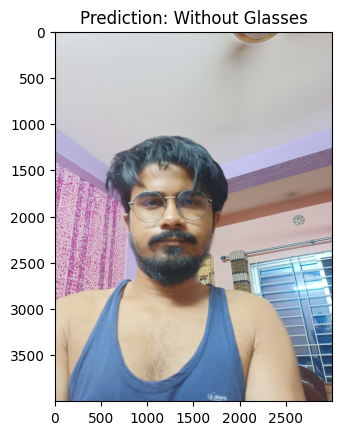

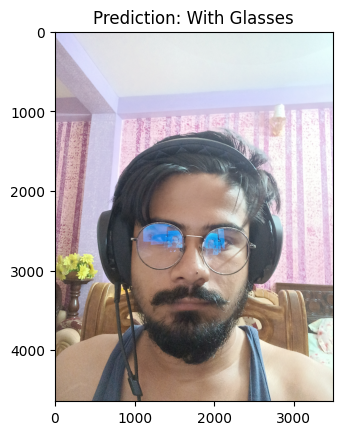

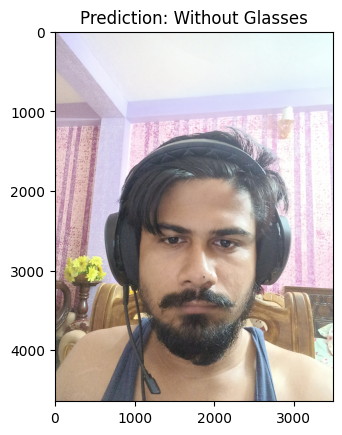

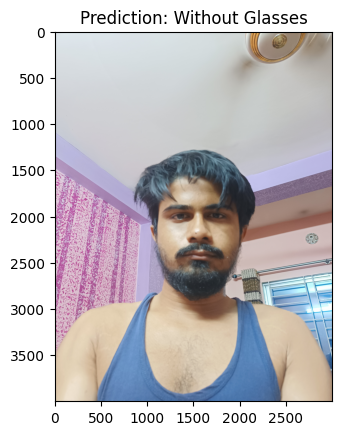

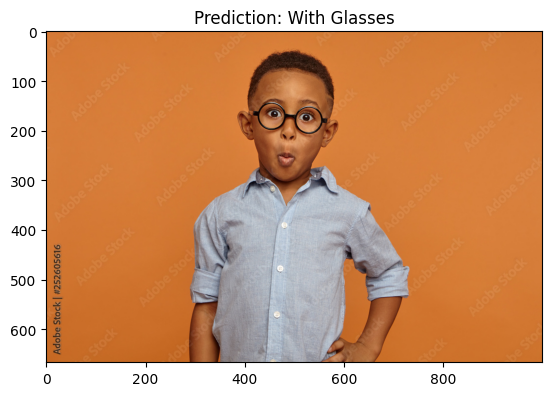

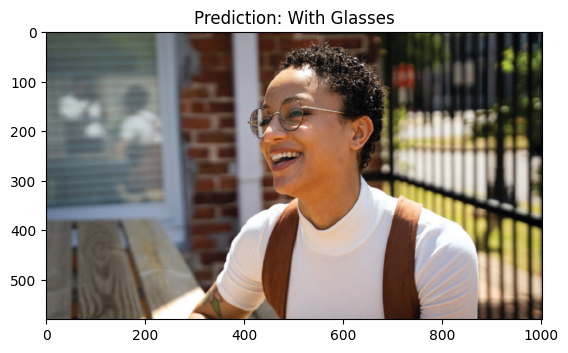

In [ ]:
import matplotlib.pyplot as plt

for i in range(len(new_image_paths)):
    plt.imshow(image.load_img(new_image_paths[i]))
    plt.title(f"Prediction: {'With Glasses' if predicted_labels[i][0] == 1 else 'Without Glasses'}")
    plt.show()
